# Geração de Gráficos para a Monografia

<hr>

Esse notebook gera os gráficos utilizados na monografia.

<hr>


In [1]:
# Import needed libraries and modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
df_gpu = pd.concat([
    pd.read_csv('../2-GP-Implementation/emissions-gpu.csv', index_col='project_name'),
    pd.read_csv('../3-GP-Optimization/emissions-gpu.csv', index_col='project_name'),
    pd.read_csv('../4-Alternative-Models/emissions-gpu.csv', index_col='project_name')
])
df_cpu = pd.concat([
    pd.read_csv('../2-GP-Implementation/emissions-cpu.csv', index_col='project_name'),
    pd.read_csv('../3-GP-Optimization/emissions-cpu.csv', index_col='project_name'),
    pd.read_csv('../4-Alternative-Models/emissions-cpu.csv', index_col='project_name')
])

# Remove irrelevant data for the analysis
df_gpu.index.name = None
df_cpu.index.name = None
columns_to_drop = ['timestamp', 'run_id', 'experiment_id', 'country_name', 'country_iso_code',
                   'region', 'cloud_provider', 'cloud_region', 'os', 'python_version',
                   'codecarbon_version', 'cpu_count', 'ram_total_size', 'longitude', 'latitude',
                   'tracking_mode', 'on_cloud']

df_gpu.drop(columns=columns_to_drop, inplace=True)
df_cpu.drop(columns=columns_to_drop, inplace=True)

# Split into model and optimization dataframes
gp_mod_gpu = df_gpu[df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('model')]
alt_mod_gpu = df_gpu[~df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('model')]
gp_opt_gpu = df_gpu[df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('optimization')]
alt_opt_gpu = df_gpu[~df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('optimization')]

gp_mod_cpu = df_cpu[df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('model')]
alt_mod_cpu = df_cpu[~df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('model')]
gp_opt_cpu = df_cpu[df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('optimization')]
alt_opt_cpu = df_cpu[~df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('optimization')]

# Update color palette
palette = ['#ffecb3', '#fcca91', '#f8a77b', '#f18271', '#e35c73', '#ca387d', '#a41c8b', '#6a1b9a']
mpl.rcParams['font.size'] = 16

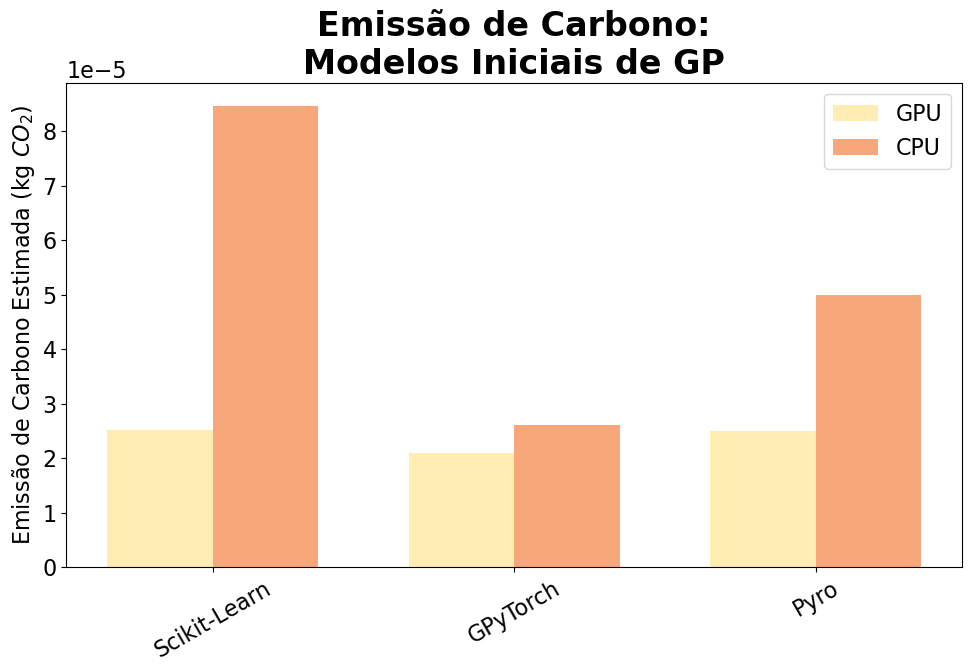

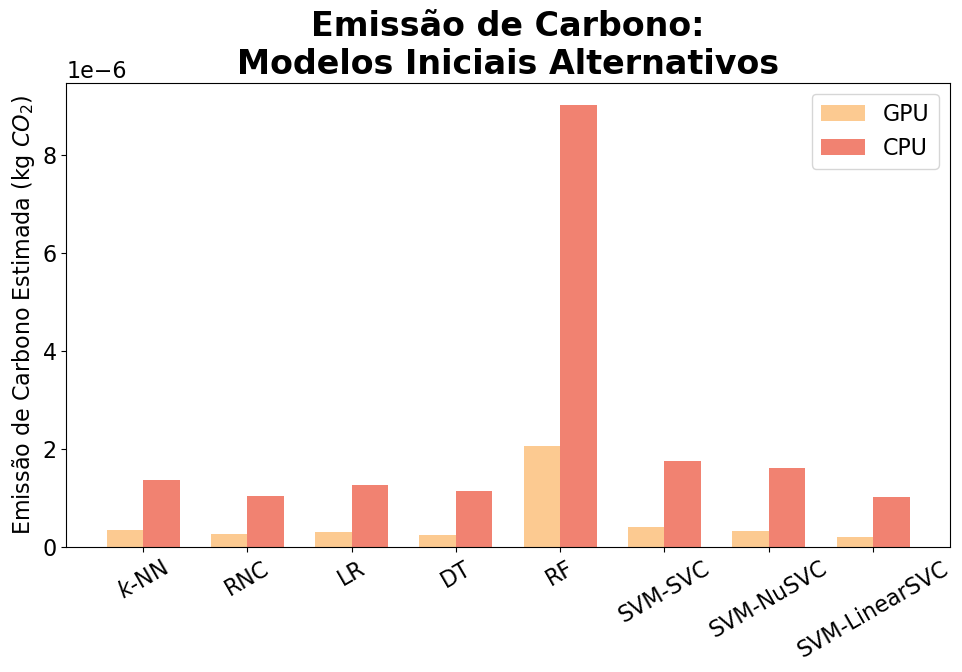

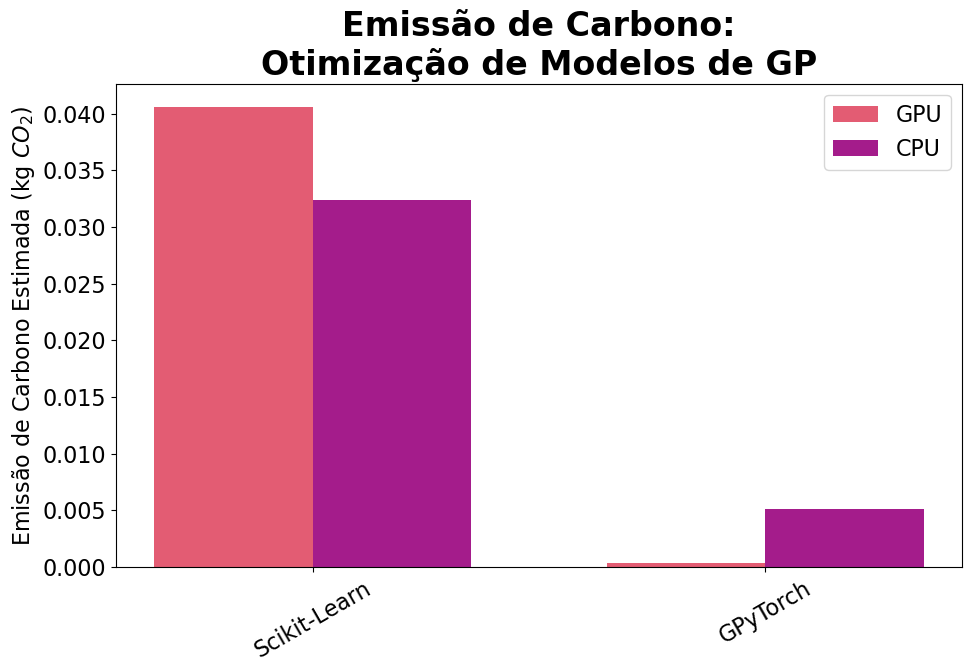

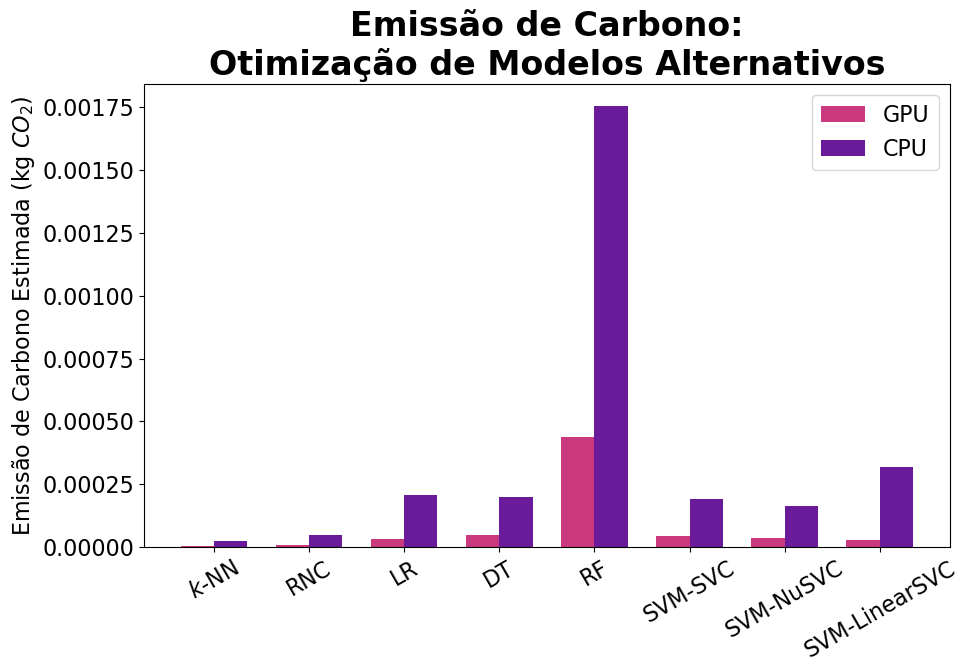

In [3]:

# ---------------------------------------------------------------------------- #
#                              EMISSÃO DE CARBONO                              #
# ---------------------------------------------------------------------------- #

# --------------------------- EMISSÃO DE CARBONO GP INI -------------------------- #
# Plot for GP Models
labels = ['Scikit-Learn', 'GPyTorch', 'Pyro']
fig, ax = plt.subplots(figsize=(10, 7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, gp_mod_gpu['emissions'], width, color=palette[0], label='GPU')
ax.bar(x + width/2, gp_mod_cpu['emissions'], width, color=palette[2], label='CPU')

ax.set_title('Emissão de Carbono:\nModelos Iniciais de GP', fontsize=24, fontweight='bold')
ax.set_ylabel('Emissão de Carbono Estimada (kg $CO_2$)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/carbono-GP-ini.png')
plt.show()

# ------------------------- EMISSÃO DE CARBONO OUTROS INI ------------------------ #
# Plot for Alternative Models
labels = ['$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, alt_mod_gpu['emissions'], width, color=palette[1], label='GPU')
ax.bar(x + width/2, alt_mod_cpu['emissions'], width, color=palette[3], label='CPU')

ax.set_title('Emissão de Carbono:\nModelos Iniciais Alternativos', fontsize=24, fontweight='bold')
ax.set_ylabel('Emissão de Carbono Estimada (kg $CO_2$)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/carbono-alt-ini.png')
plt.show()

# ------------------------- EMISSÃO DE CARBONO GP OPT ------------------------ #
# Plot for GP OPT
labels = ['Scikit-Learn', 'GPyTorch']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, gp_opt_gpu['emissions'], width, color=palette[4], label='GPU')
ax.bar(x + width/2, gp_opt_cpu['emissions'], width, color=palette[6], label='CPU')

ax.set_title('Emissão de Carbono:\nOtimização de Modelos de GP', fontsize=24, fontweight='bold')
ax.set_ylabel('Emissão de Carbono Estimada (kg $CO_2$)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/carbono-GP-opt.png')
plt.show()

# ------------------------- EMISSÃO DE CARBONO OUTROS OPT ------------------------ #
# Plot for Alternative Models
labels = ['$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, alt_opt_gpu['emissions'], width, color=palette[5], label='GPU')
ax.bar(x + width/2, alt_opt_cpu['emissions'], width, color=palette[7], label='CPU')

ax.set_title('Emissão de Carbono:\nOtimização de Modelos Alternativos', fontsize=24, fontweight='bold')
ax.set_ylabel('Emissão de Carbono Estimada (kg $CO_2$)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/carbono-alt-opt.png')
plt.show()

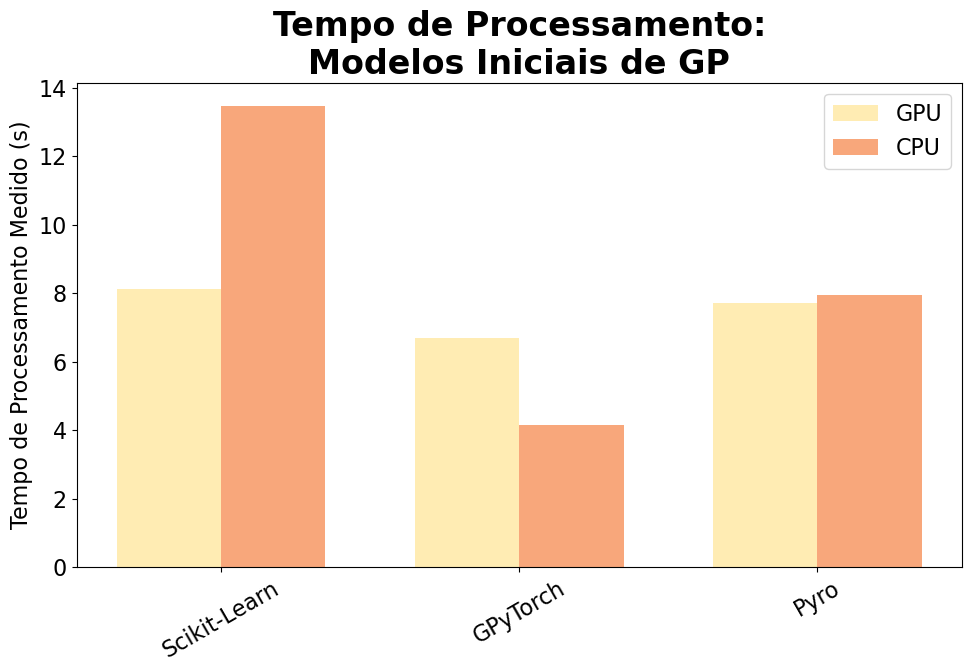

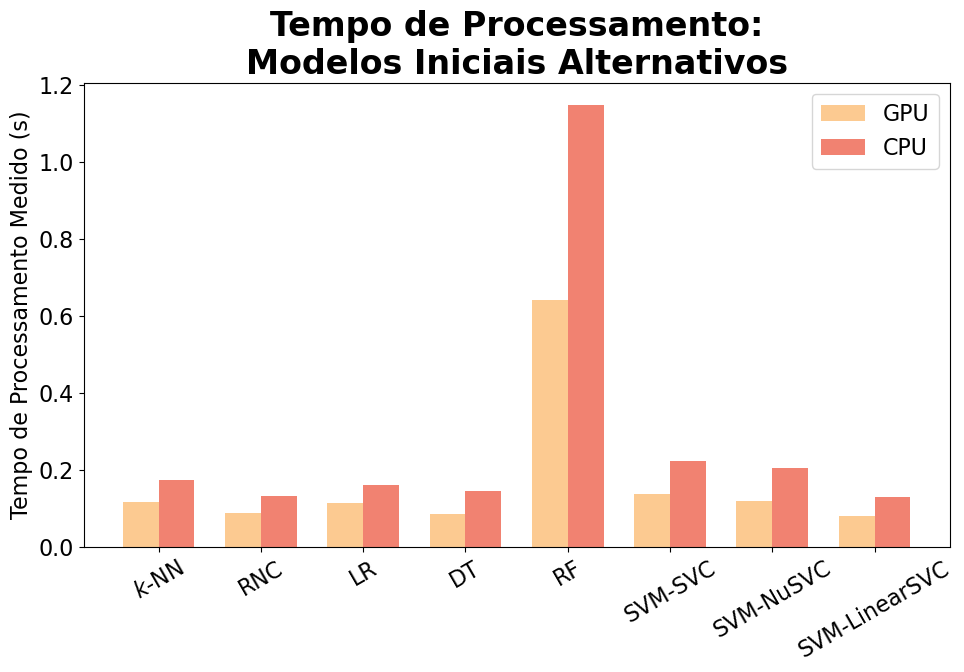

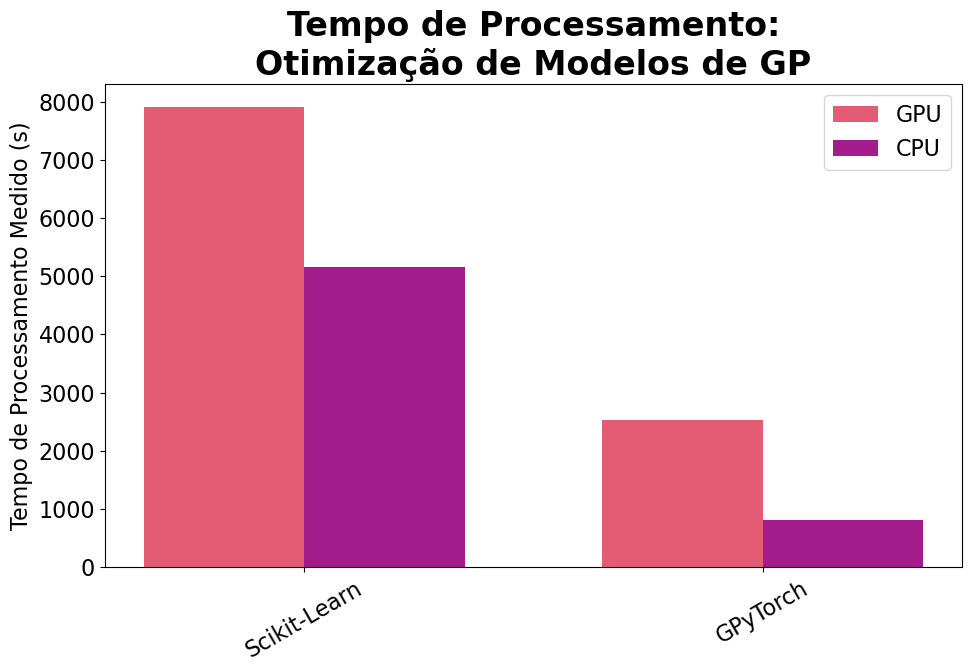

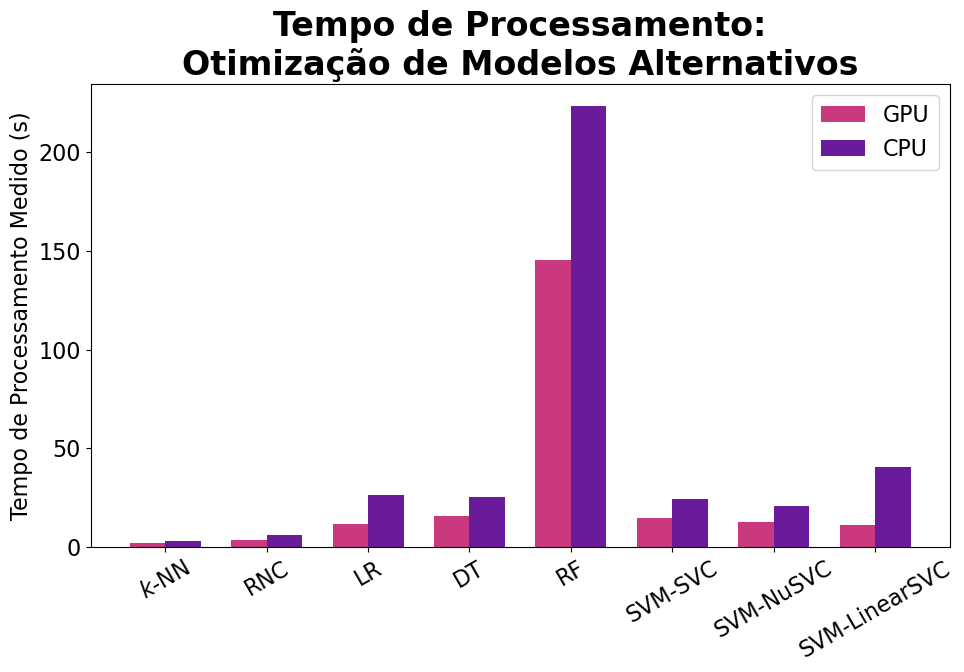

In [4]:
# ---------------------------------------------------------------------------- #
#                              TEMPO DE PROCESSAMENTO                          #
# ---------------------------------------------------------------------------- #

# --------------------------- TEMPO DE PROCESSAMENTO GP INI -------------------------- #
# Plot for GP Models
labels = ['Scikit-Learn', 'GPyTorch', 'Pyro']
fig, ax = plt.subplots(figsize=(10, 7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, gp_mod_gpu['duration'], width, color=palette[0], label='GPU')
ax.bar(x + width/2, gp_mod_cpu['duration'], width, color=palette[2], label='CPU')

ax.set_title('Tempo de Processamento:\nModelos Iniciais de GP', fontsize=24, fontweight='bold')
ax.set_ylabel('Tempo de Processamento Medido (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/tempo-GP-ini.png')
plt.show()

# ------------------------- TEMPO DE PROCESSAMENTO OUTROS INI ------------------------ #
# Plot for Alternative Models
labels = ['$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, alt_mod_gpu['duration'], width, color=palette[1], label='GPU')
ax.bar(x + width/2, alt_mod_cpu['duration'], width, color=palette[3], label='CPU')

ax.set_title('Tempo de Processamento:\nModelos Iniciais Alternativos', fontsize=24, fontweight='bold')
ax.set_ylabel('Tempo de Processamento Medido (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/tempo-alt-ini.png')
plt.show()

# ------------------------- TEMPO DE PROCESSAMENTO GP OPT ------------------------ #
# Plot for GP OPT
labels = ['Scikit-Learn', 'GPyTorch']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, gp_opt_gpu['duration'], width, color=palette[4], label='GPU')
ax.bar(x + width/2, gp_opt_cpu['duration'], width, color=palette[6], label='CPU')

ax.set_title('Tempo de Processamento:\nOtimização de Modelos de GP', fontsize=24, fontweight='bold')
ax.set_ylabel('Tempo de Processamento Medido (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/tempo-GP-opt.png')
plt.show()

# ------------------------- TEMPO DE PROCESSAMENTO OUTROS OPT ------------------------ #
# Plot for Alternative Models
labels = ['$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, alt_opt_gpu['duration'], width, color=palette[5], label='GPU')
ax.bar(x + width/2, alt_opt_cpu['duration'], width, color=palette[7], label='CPU')

ax.set_title('Tempo de Processamento:\nOtimização de Modelos Alternativos', fontsize=24, fontweight='bold')
ax.set_ylabel('Tempo de Processamento Medido (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/tempo-alt-opt.png')
plt.show()

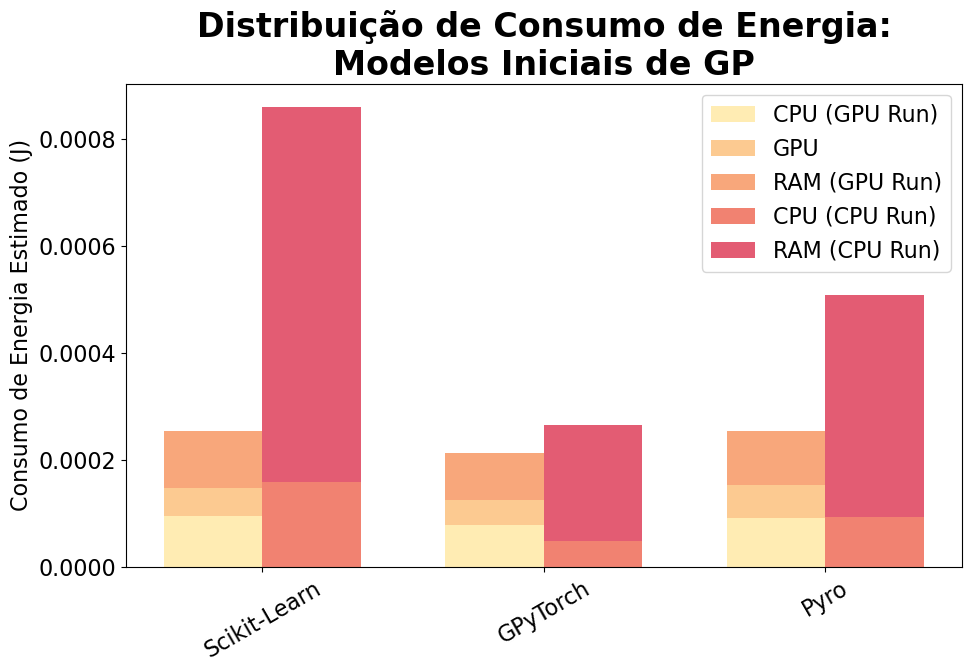

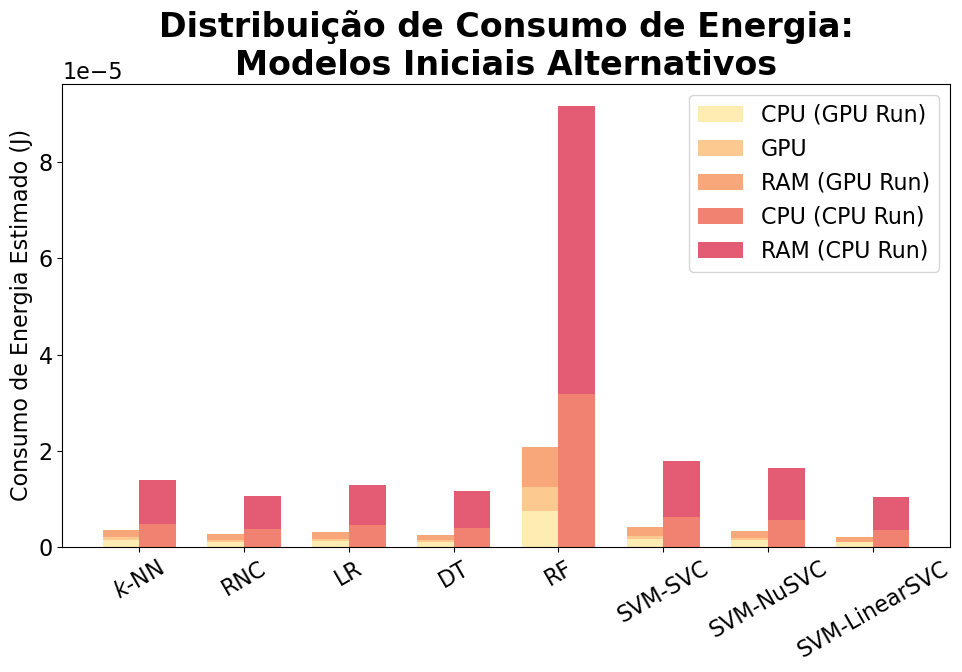

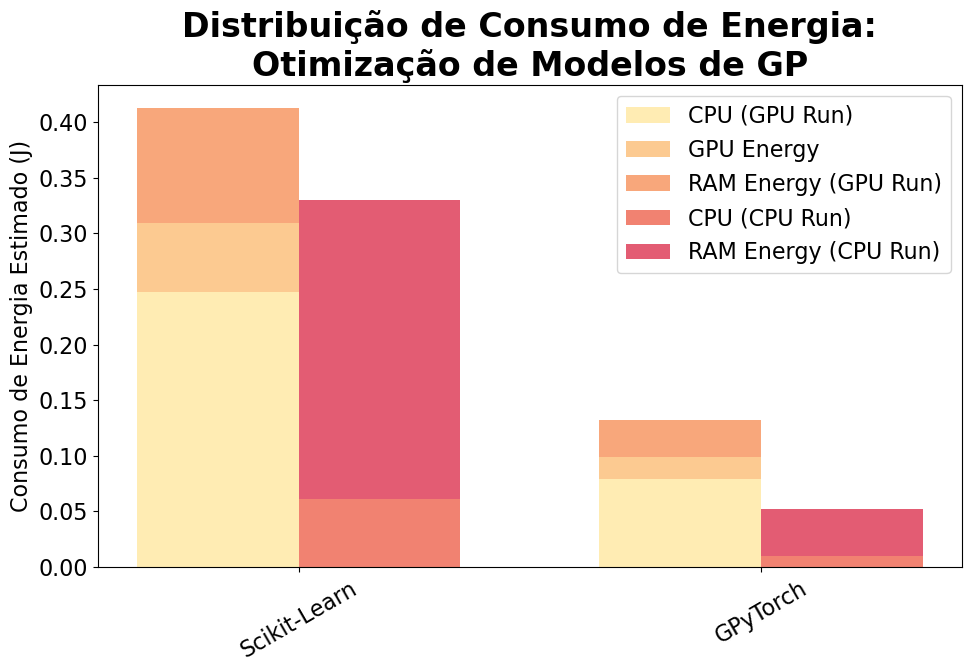

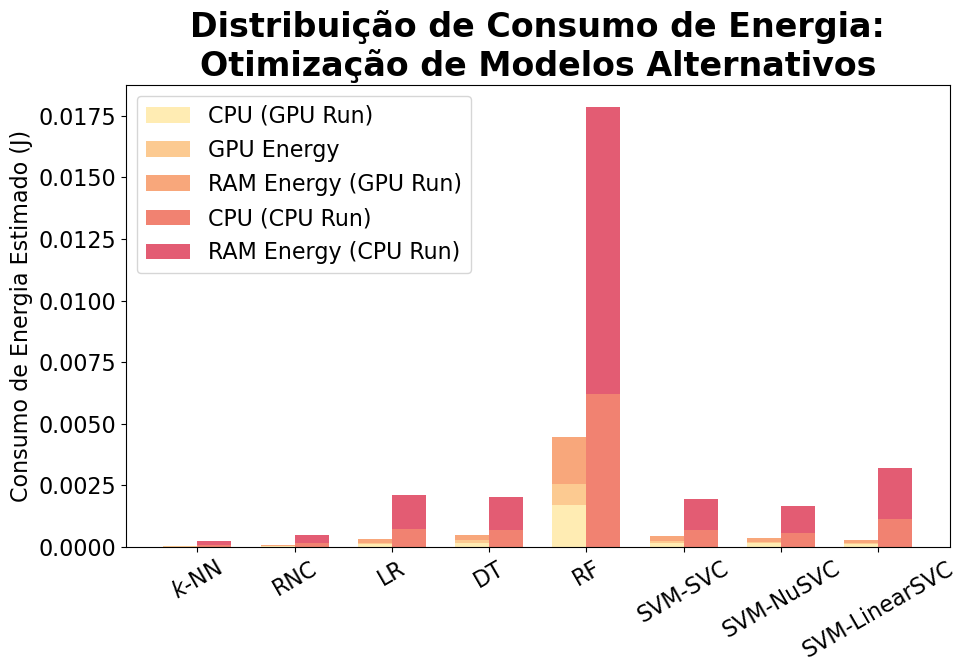

In [5]:
# ---------------------------------------------------------------------------- #
#                              ENERGY BREAKDOWN                                #
# ---------------------------------------------------------------------------- #

# --------------------------- ENERGY BREAKDOWN GP INI -------------------------- #
# Plot for GP Models
labels = ['Scikit-Learn', 'GPyTorch', 'Pyro']
fig, ax = plt.subplots(figsize=(10, 7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, gp_mod_gpu['cpu_energy'], width, color=palette[0], label='CPU (GPU Run)')
ax.bar(x - width/2, gp_mod_gpu['gpu_energy'], width, bottom=gp_mod_gpu['cpu_energy'], color=palette[1], label='GPU')
ax.bar(x - width/2, gp_mod_gpu['ram_energy'], width, bottom=gp_mod_gpu['cpu_energy'] + gp_mod_gpu['gpu_energy'], color=palette[2], label='RAM (GPU Run)')
ax.bar(x + width/2, gp_mod_cpu['cpu_energy'], width, color=palette[3], label='CPU (CPU Run)')
ax.bar(x + width/2, gp_mod_cpu['ram_energy'], width, bottom=gp_mod_cpu['cpu_energy'], color=palette[4], label='RAM (CPU Run)')

ax.set_title('Distribuição de Consumo de Energia:\nModelos Iniciais de GP', fontsize=24, fontweight='bold')
ax.set_ylabel('Consumo de Energia Estimado (J)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/energia-GP-ini.png')
plt.show()

# ------------------------- ENERGY BREAKDOWN OUTROS INI ------------------------ #
# Plot for Alternative Models
labels = ['$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, alt_mod_gpu['cpu_energy'], width, color=palette[0], label='CPU (GPU Run)')
ax.bar(x - width/2, alt_mod_gpu['gpu_energy'], width, bottom=alt_mod_gpu['cpu_energy'], color=palette[1], label='GPU')
ax.bar(x - width/2, alt_mod_gpu['ram_energy'], width, bottom=alt_mod_gpu['cpu_energy'] + alt_mod_gpu['gpu_energy'], color=palette[2], label='RAM (GPU Run)')
ax.bar(x + width/2, alt_mod_cpu['cpu_energy'], width, color=palette[3], label='CPU (CPU Run)')
ax.bar(x + width/2, alt_mod_cpu['ram_energy'], width, bottom=alt_mod_cpu['cpu_energy'], color=palette[4], label='RAM (CPU Run)')

ax.set_title('Distribuição de Consumo de Energia:\nModelos Iniciais Alternativos', fontsize=24, fontweight='bold')
ax.set_ylabel('Consumo de Energia Estimado (J)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/energia-alt-ini.png')
plt.show()

# ------------------------- ENERGY BREAKDOWN GP OPT ------------------------ #
# Plot for GP OPT
labels = ['Scikit-Learn', 'GPyTorch']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, gp_opt_gpu['cpu_energy'], width, color=palette[0], label='CPU (GPU Run)')
ax.bar(x - width/2, gp_opt_gpu['gpu_energy'], width, bottom=gp_opt_gpu['cpu_energy'], color=palette[1], label='GPU Energy')
ax.bar(x - width/2, gp_opt_gpu['ram_energy'], width, bottom=gp_opt_gpu['cpu_energy'] + gp_opt_gpu['gpu_energy'], color=palette[2], label='RAM Energy (GPU Run)')
ax.bar(x + width/2, gp_opt_cpu['cpu_energy'], width, color=palette[3], label='CPU (CPU Run)')
ax.bar(x + width/2, gp_opt_cpu['ram_energy'], width, bottom=gp_opt_cpu['cpu_energy'], color=palette[4], label='RAM Energy (CPU Run)')

ax.set_title('Distribuição de Consumo de Energia:\nOtimização de Modelos de GP', fontsize=24, fontweight='bold')
ax.set_ylabel('Consumo de Energia Estimado (J)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/energia-GP-opt.png')
plt.show()

# ------------------------- ENERGY BREAKDOWN OUTROS OPT ------------------------ #
# Plot for Alternative Models
labels = ['$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

ax.bar(x - width/2, alt_opt_gpu['cpu_energy'], width, color=palette[0], label='CPU (GPU Run)')
ax.bar(x - width/2, alt_opt_gpu['gpu_energy'], width, bottom=alt_opt_gpu['cpu_energy'], color=palette[1], label='GPU Energy')
ax.bar(x - width/2, alt_opt_gpu['ram_energy'], width, bottom=alt_opt_gpu['cpu_energy'] + alt_opt_gpu['gpu_energy'], color=palette[2], label='RAM Energy (GPU Run)')
ax.bar(x + width/2, alt_opt_cpu['cpu_energy'], width, color=palette[3], label='CPU (CPU Run)')
ax.bar(x + width/2, alt_opt_cpu['ram_energy'], width, bottom=alt_opt_cpu['cpu_energy'], color=palette[4], label='RAM Energy (CPU Run)')

ax.set_title('Distribuição de Consumo de Energia:\nOtimização de Modelos Alternativos', fontsize=24, fontweight='bold')
ax.set_ylabel('Consumo de Energia Estimado (J)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/energia-alt-opt.png')
plt.show()

In [6]:
# Load data - GPU only
df_gpu = pd.concat([
    pd.read_csv('../2-GP-Implementation/scores-gpu.csv', index_col=0),
    pd.read_csv('../3-GP-Optimization/scores-gpu.csv', index_col=0),
    pd.read_csv('../4-Alternative-Models/scores-gpu.csv', index_col=0)
], axis=1)

# Transpose the entire dataframe to make columns into rows
df_gpu = df_gpu.T

# Split into model and optimization dataframes
model_df_gpu = df_gpu[df_gpu.index.str.contains('model')]
optim_df_gpu = df_gpu[df_gpu.index.str.contains('optimization')]

optim_df_gpu = optim_df_gpu.drop('pyro-optimization')


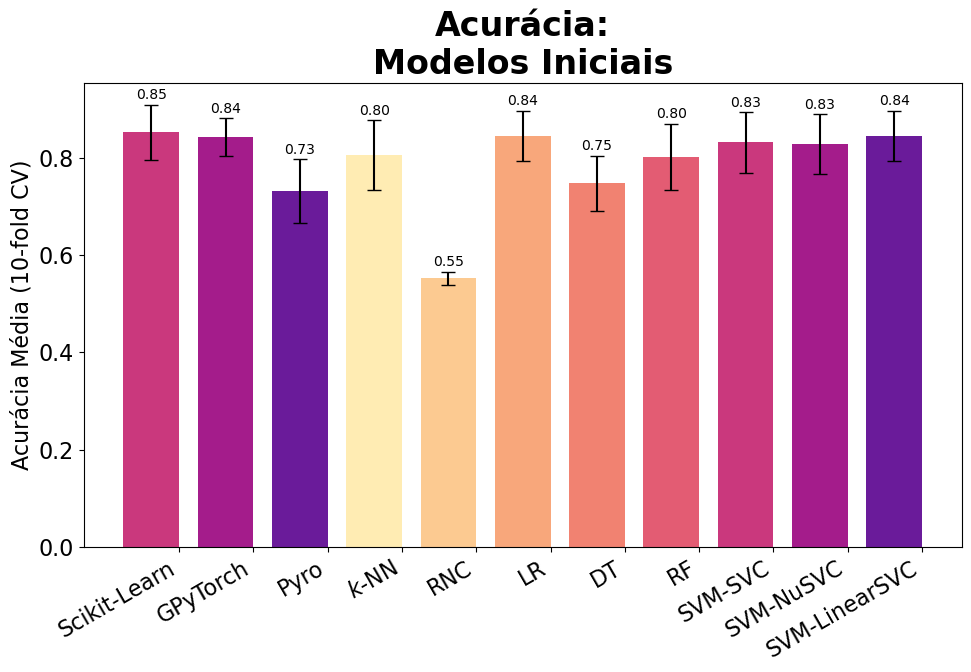

In [7]:
# ---------------------------------------------------------------------------- #
#                              ACURÁCIA                                        #
# ---------------------------------------------------------------------------- #
special_palette = palette[5:8]
special_palette.extend(palette)

# --------------------------- ACURÁCIA MODELOS INI --------------------------- #
# Plot for Initial Models
labels = ['Scikit-Learn', 'GPyTorch', 'Pyro','$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10, 7))
width = .75
x = np.arange(len(labels))

# Accuracy
bars = ax.bar(x - width/2, model_df_gpu['Accuracy'], width, yerr=model_df_gpu['Accuracy STD'], color=special_palette, capsize=5)

ax.set_title('Acurácia:\nModelos Iniciais', fontsize=24, fontweight='bold')
ax.set_ylabel('Acurácia Média (10-fold CV)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')

# Add text
for bar, accuracy, error in zip(bars, model_df_gpu['Accuracy'], model_df_gpu['Accuracy STD']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + error + 0.005,   # Y position (above the bar + error bar)
        f'{accuracy:.2f}',                 # Text (formatted accuracy value)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10                        # Font size
    )

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/acc-ini.png')
plt.show()

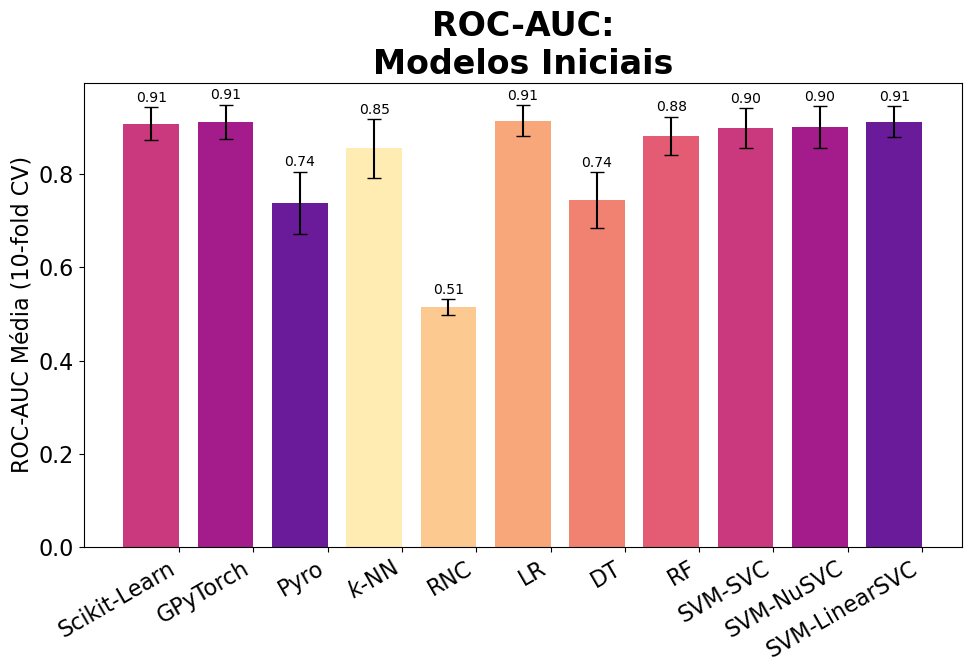

In [8]:
# ---------------------------------------------------------------------------- #
#                              AUC-ROC                                         #
# ---------------------------------------------------------------------------- #

# --------------------------- AUC-ROC MODELOS INI ---------------------------- #
# Plot for Initial Models
labels = ['Scikit-Learn', 'GPyTorch', 'Pyro','$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10, 7))
width = .75
x = np.arange(len(labels))

# Accuracy
bars = ax.bar(x - width/2, model_df_gpu['AUC-ROC'], width, yerr=model_df_gpu['AUC-ROC STD'], color=special_palette, capsize=5)

ax.set_title('ROC-AUC:\nModelos Iniciais', fontsize=24, fontweight='bold')
ax.set_ylabel('ROC-AUC Média (10-fold CV)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')

# Add text
for bar, accuracy, error in zip(bars, model_df_gpu['AUC-ROC'], model_df_gpu['AUC-ROC STD']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + error + 0.005,   # Y position (above the bar + error bar)
        f'{accuracy:.2f}',                 # Text (formatted accuracy value)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10                        # Font size
    )

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/rocauc-ini.png')
plt.show()


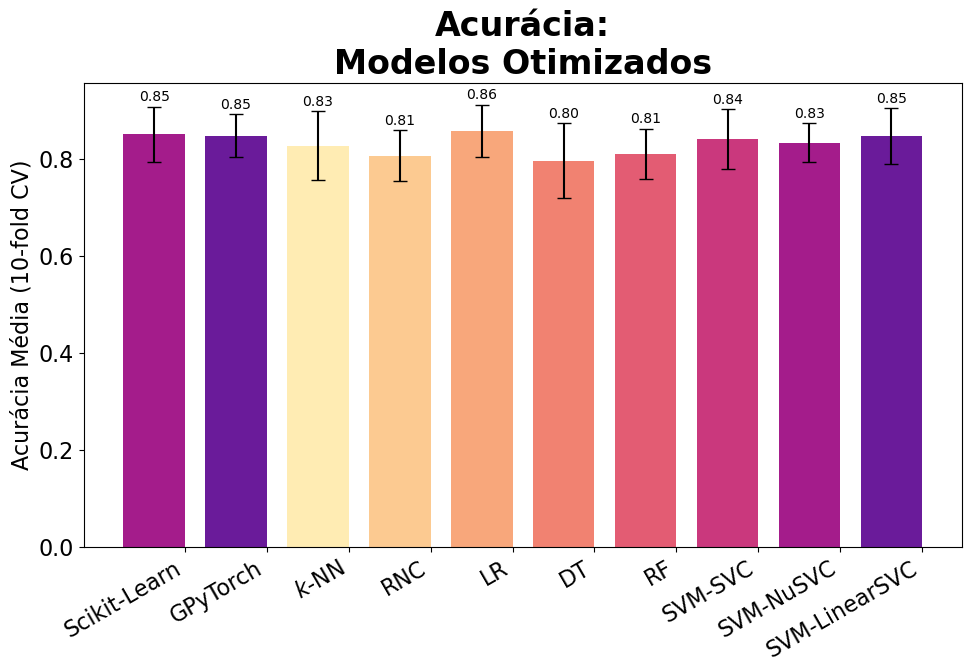

In [9]:
# ---------------------------------------------------------------------------- #
#                              ACURÁCIA                                        #
# ---------------------------------------------------------------------------- #
special_palette = palette[6:8]
special_palette.extend(palette)


# --------------------------- ACURÁCIA MODELOS OPT --------------------------- #
# Plot for Initial Models
labels = ['Scikit-Learn', 'GPyTorch', '$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10, 7))
width = .75
x = np.arange(len(labels))

# Accuracy
bars = ax.bar(x - width/2, optim_df_gpu['Accuracy'], width, yerr=optim_df_gpu['Accuracy STD'], color=special_palette, capsize=5)

ax.set_title('Acurácia:\nModelos Otimizados', fontsize=24, fontweight='bold')
ax.set_ylabel('Acurácia Média (10-fold CV)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')

# Add text
for bar, accuracy, error in zip(bars, optim_df_gpu['Accuracy'], optim_df_gpu['Accuracy STD']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + error + 0.005,   # Y position (above the bar + error bar)
        f'{accuracy:.2f}',                 # Text (formatted accuracy value)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10                        # Font size
    )

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/acc-opt.png')
plt.show()


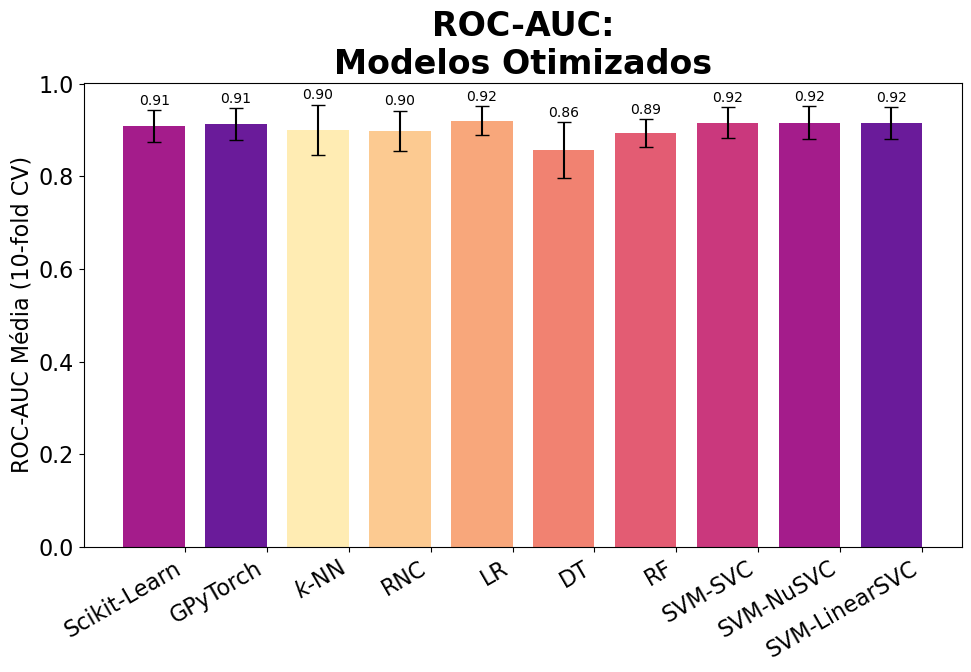

In [10]:
# ---------------------------------------------------------------------------- #
#                              AUC-ROC                                         #
# ---------------------------------------------------------------------------- #

# --------------------------- AUC-ROC MODELOS INI ---------------------------- #
# Plot for Initial Models
labels = ['Scikit-Learn', 'GPyTorch', '$k$-NN', 'RNC', 'LR', 'DT', 'RF', 'SVM-SVC', 'SVM-NuSVC', 'SVM-LinearSVC']
fig, ax = plt.subplots(figsize=(10, 7))
width = .75
x = np.arange(len(labels))

# Accuracy
bars = ax.bar(x - width/2, optim_df_gpu['AUC-ROC'], width, yerr=optim_df_gpu['AUC-ROC STD'], color=special_palette, capsize=5)

ax.set_title('ROC-AUC:\nModelos Otimizados', fontsize=24, fontweight='bold')
ax.set_ylabel('ROC-AUC Média (10-fold CV)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')

# Add text
for bar, accuracy, error in zip(bars, optim_df_gpu['AUC-ROC'], optim_df_gpu['AUC-ROC STD']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + error + 0.005,   # Y position (above the bar + error bar)
        f'{accuracy:.2f}',                 # Text (formatted accuracy value)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10                        # Font size
    )

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/rocauc-opt.png')
plt.show()
